# Mini Project 1: Structured Data
## IST652 - Scripting for Data Analysis
#### Khushi Shetty
#### SUID: 855125581

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### Exploratory Data Analysis

#### Read the airline data into panda dataframe

In [2]:
airline_data = pd.read_csv('Airline Dataset.csv')

#### Cleaning and Formatting of the data

In [3]:
airline_data.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


In [4]:
airline_data.tail()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
98614,hnGQ62,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12-11-2022,HAA,Pammie Kingscote,Cancelled
98615,2omEzh,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Dorice Lochran,Cancelled
98616,VUPiVG,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,09-10-2022,ABC,Gearalt Main,On Time
98617,E47NtS,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Judon Chasle,Cancelled
98618,8JYEcz,Wilhelmine,Touret,Female,10,Poland,Yoshkar-Ola Airport,RU,Russian Federation,EU,Europe,4/16/2022,JOK,Auguste Tindley,Delayed


In [5]:
airline_data.shape
# There are 98619 rows and 15 columns in the airline dataframe

(98619, 15)

In [6]:
# Dropping the unnecessary columns
airline_df = airline_data.drop(['First Name','Last Name','Airport Country Code','Airport Continent'], axis = 1)

In [7]:
# Viewing the shape of the dataframe after dropping columns
airline_df.shape
# Now there are 98619 rows and 11 columns in the airline dataframe

(98619, 11)

In [8]:
# Viewing the column names of the dataframe
airline_df.columns

Index(['Passenger ID', 'Gender', 'Age', 'Nationality', 'Airport Name',
       'Country Name', 'Continents', 'Departure Date', 'Arrival Airport',
       'Pilot Name', 'Flight Status'],
      dtype='object')

In [9]:
# Change certain column names for better understanding
new_column_names = {'Country Name': 'Airport Country', 'Continents': 'Airport Continent'}
airline_df.rename(columns=new_column_names, inplace=True)

In [10]:
# Veiwing the columns after changing the column names
airline_df.columns

Index(['Passenger ID', 'Gender', 'Age', 'Nationality', 'Airport Name',
       'Airport Country', 'Airport Continent', 'Departure Date',
       'Arrival Airport', 'Pilot Name', 'Flight Status'],
      dtype='object')

In [11]:
# Veiwing the data types of each column
airline_df.dtypes

Passenger ID         object
Gender               object
Age                   int64
Nationality          object
Airport Name         object
Airport Country      object
Airport Continent    object
Departure Date       object
Arrival Airport      object
Pilot Name           object
Flight Status        object
dtype: object

In [12]:
# The 'Departure Date' column is currently assigned the 'object' data type.
# Without a 'datetime' data type, we cannot perform date and time-related operations
# or analysis on this column.
# To address this, we will convert the 'Departure Date' values to the 'datetime' data type.

In [13]:
# Replace '-' with '/' in the 'Departure Date' column
# This operation is performed to standardize the date format in the 'Departure Date' column.
# It replaces hyphens ('-') with forward slashes ('/') to ensure consistent date formatting.
# Inconsistent date formatting can lead to incorrect date parsing, 
# potentially resulting in NaT (Not a Timestamp) values.

airline_df['Departure Date'] = airline_df['Departure Date'].str.replace('-', '/')

In [14]:
# We are converting the 'Departure Date' column to the 'datetime' data type using 'pd.to_datetime'.
airline_df['Departure Date'] = pd.to_datetime(airline_df['Departure Date'], errors='coerce')

# The 'errors='coerce'' parameter ensures that any invalid dates are replaced with NaT (Not a Timestamp).

In [15]:
# We can verify the data types of the columns in the airline dataset using 'airline_df.dtypes'.
airline_df.dtypes

# We can confirm that the 'Departure Date' column has successfully changed 
# its data type to 'datetime'.

Passenger ID                 object
Gender                       object
Age                           int64
Nationality                  object
Airport Name                 object
Airport Country              object
Airport Continent            object
Departure Date       datetime64[ns]
Arrival Airport              object
Pilot Name                   object
Flight Status                object
dtype: object

In [16]:
# Check for NaT values in the "Departure Date" column
na_values = airline_df['Departure Date'].isna()

# Count the number of NaT values in the column
count_na = na_values.sum()

# Print the count of NaT values
print(f"Number of NaT values: {count_na}")

# The output shows that the count of NaT (Not a Timestamp) values 
# in the 'Departure Date' column is zero.

Number of NaT values: 0


In [17]:
# Let's view the first few rows of the dataset to check the 'Departure Date' column.
airline_df.head()

,Passenger ID,Gender,Age,Nationality,Airport Name,Airport Country,Airport Continent,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Female,62,Japan,Coldfoot Airport,United States,North America,2022-06-28,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,2022-12-26,YCO,Marla Parsonage,On Time
2,CdUz2g,Male,67,Russia,Grenoble-Isère Airport,France,Europe,2022-01-18,GNB,Rhonda Amber,On Time
3,BRS38V,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,2022-09-16,YND,Kacie Commucci,Delayed
4,9kvTLo,Male,21,China,Gillespie Field,United States,North America,2022-02-25,SEE,Ebonee Tree,On Time


In [18]:
# Let's view the last few rows of the dataset to check the 'Departure Date' column.
airline_df.tail()

,Passenger ID,Gender,Age,Nationality,Airport Name,Airport Country,Airport Continent,Departure Date,Arrival Airport,Pilot Name,Flight Status
98614,hnGQ62,Male,85,China,Hasvik Airport,Norway,Europe,2022-12-11,HAA,Pammie Kingscote,Cancelled
98615,2omEzh,Female,19,Russia,Ampampamena Airport,Madagascar,Africa,2022-10-30,IVA,Dorice Lochran,Cancelled
98616,VUPiVG,Male,65,Indonesia,Albacete-Los Llanos Airport,Spain,Europe,2022-09-10,ABC,Gearalt Main,On Time
98617,E47NtS,Female,34,China,Gagnoa Airport,Côte d'Ivoire,Africa,2022-10-26,GGN,Judon Chasle,Cancelled
98618,8JYEcz,Female,10,Poland,Yoshkar-Ola Airport,Russian Federation,Europe,2022-04-16,JOK,Auguste Tindley,Delayed


In [19]:
# Cheking if any value is null in dataset.
airline_df.isna().any(axis=0)

# There are no Null values in the dataset

Passenger ID         False
Gender               False
Age                  False
Nationality          False
Airport Name         False
Airport Country      False
Airport Continent    False
Departure Date       False
Arrival Airport      False
Pilot Name           False
Flight Status        False
dtype: bool

In [20]:
# Checking for any duplicates in the dataset
duplicates = airline_df[airline_df.duplicated()]
print(duplicates)

# The output shows that there are no duplicates in the dataset

Empty DataFrame
Columns: [Passenger ID, Gender, Age, Nationality, Airport Name, Airport Country, Airport Continent, Departure Date, Arrival Airport, Pilot Name, Flight Status]
Index: []


In [21]:
# Checking the number of unique values in each column
airline_df.nunique()

Passenger ID         98619
Gender                   2
Age                     90
Nationality            240
Airport Name          9062
Airport Country        235
Airport Continent        6
Departure Date         364
Arrival Airport       9024
Pilot Name           98605
Flight Status            3
dtype: int64

In [22]:
# Summary statistics of the numeric columns in the dataset.
airline_df.describe()

,Age,Departure Date
count,98619.000000,98619
mean,45.504021,2022-07-01 01:24:51.886959104
min,1.000000,2022-01-01 00:00:00
25%,23.000000,2022-04-01 00:00:00
50%,46.000000,2022-07-01 00:00:00
75%,68.000000,2022-09-30 00:00:00
max,90.000000,2022-12-30 00:00:00
std,25.929849,NaN


### How many entries correspond to the same flight based on identical departure date, airport name, and pilot name?

In [23]:
# Find duplicate passenger entries that share the same flight based on date, location, and pilot.
# We check for duplicates with the same 'Departure Date,' 'Airport Name,' and 'Pilot Name.'
duplicate_rows = airline_df[airline_df.duplicated(subset=['Departure Date', 'Airport Name', 'Pilot Name'], keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [Passenger ID, Gender, Age, Nationality, Airport Name, Airport Country, Airport Continent, Departure Date, Arrival Airport, Pilot Name, Flight Status]
Index: []


In [24]:
# The output indicates that there are no duplicate entries for the same flight.
# This means that the number of passenger entries is equivalent to number of flights in the dataset.
# Hence, the number of entries will be considered as both: Number of flights and Number of Passengers

### What are the flight counts by airport continent, flight status, and gender, and how many male and female passengers are in each category?

In [38]:
# Displays the number of flights for each airport continent and flight status

# Group the data by "Airport Continent" and "Flight Status" and calculate the count of flights for each combination
# The count() function is used to count the number of non-null values in 'Passenger ID'
# If any combinations have missing data, we will fill those with 0 using 'unstack(fill_value=0)'
# This ensures that all possible combinations have counts, even if they are 0.
flight_status_per_continent = airline_df.groupby(['Airport Continent', 'Flight Status'])['Passenger ID'].count().unstack(fill_value=0)

# Display the result 
flight_status_per_continent

Flight Status,Cancelled,Delayed,On Time
Airport Continent,,,
Africa,3657,3654,3719
Asia,6235,6160,6242
Europe,4095,4178,4062
North America,10693,10696,10644
Oceania,4619,4634,4613
South America,3643,3509,3566


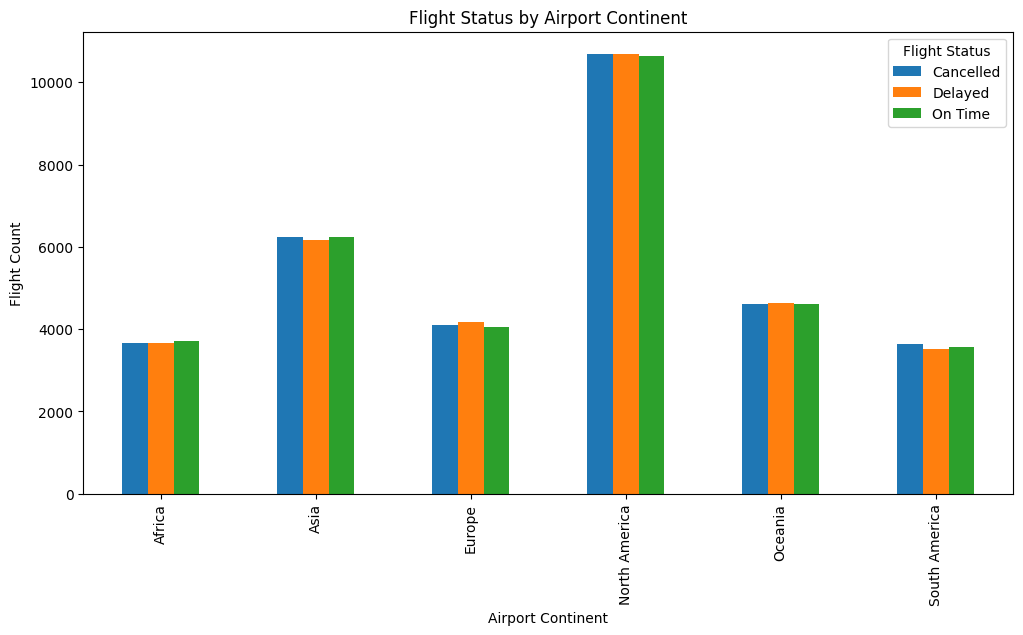

In [26]:
# Plot a bar graph
flight_status_per_continent.plot(kind='bar', figsize=(12, 6))
plt.title('Flight Status by Airport Continent')
plt.xlabel('Airport Continent')
plt.ylabel('Flight Count')

plt.show()

In [39]:
# Flight counts by airport continent, flight status, and gender, and how many male and female passengers are in each category

# Group the data by "Airport Continent," "Flight Status," and "Gender" and calculate the count of flights for each combination
flight_status_gender_per_continent = airline_df.groupby(['Airport Continent', 'Flight Status', 'Gender'])['Passenger ID'].count().unstack(fill_value=0)

# Rename the columns
flight_status_gender_per_continent.columns.name = None
flight_status_gender_per_continent.rename(columns={'Female': 'Female Passengers', 'Male': 'Male Passengers'}, inplace=True)

# Display the result as a Pandas DataFrame
flight_status_gender_per_continent


Female Passengers  Male Passengers
Airport Continent Flight Status                                    
Africa            Cancelled                   1852             1805
                  Delayed                     1851             1803
                  On Time                     1847             1872
Asia              Cancelled                   3096             3139
                  Delayed                     2999             3161
                  On Time                     3073             3169
Europe            Cancelled                   2076             2019
                  Delayed                     2071             2107
                  On Time                     2015             2047
North America     Cancelled                   5243             5450
                  Delayed                     5285             5411
                  On Time                     5269             5375
Oceania           Cancelled                   2317             2302
                  Delayed                     2366             2268
                  On Time                     2303             2310
South America     Cancelled                   1868             1775
                  Delayed                     1719             1790
                  On Time                     1771             1795

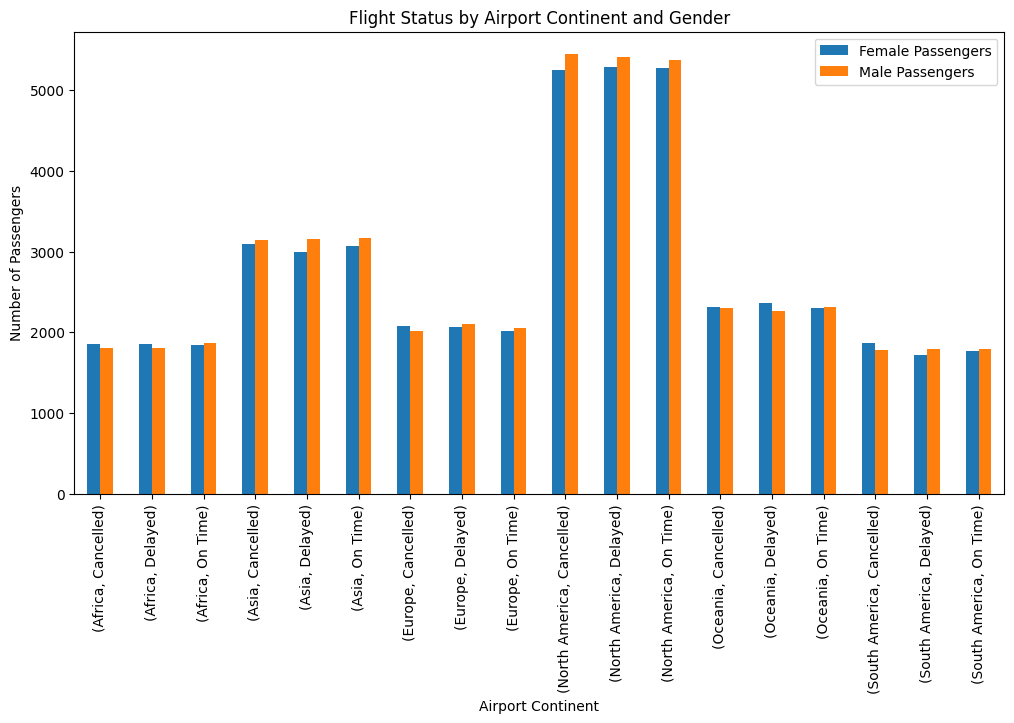

In [40]:
# Plot a bar graph
flight_status_gender_per_continent.plot(kind='bar', figsize=(12, 6))
plt.title('Flight Status by Airport Continent and Gender')
plt.xlabel('Airport Continent')
plt.ylabel('Number of Passengers')

plt.show()

In [41]:
# Exporting the result to CSV
flight_status_gender_per_continent.to_csv('output//flight_status_gender_per_continent.csv')

### What is the distribution of passengers in various age groups?

In [42]:
# Define the bin edges and labels for age groups
bin_edges = [0, 18, 30, 40, 50, 60, 100]
bin_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60+']

# Create a new column "Age Group" by binning the "Age" column
airline_df['Age Group'] = pd.cut(airline_df['Age'], bins=bin_edges, labels=bin_labels)

# Calculate the count of passengers in each age group by gender
age_group_counts = airline_df.groupby(['Age Group', 'Gender']).size().unstack(fill_value=0)

# Replace column names
age_group_counts.rename(columns={'Female': 'Female Passengers', 'Male': 'Male Passengers'}, inplace=True)

# Calculate the total count for each age group
age_group_counts['Total Count'] = age_group_counts.sum(axis=1)

# Calculate the percentage of males and females in each age group
age_group_counts['Male %'] = (age_group_counts['Male Passengers'] / age_group_counts['Total Count']) * 100
age_group_counts['Female %'] = (age_group_counts['Female Passengers'] / age_group_counts['Total Count']) * 100

# Reset the index to make "Age Group" a column
age_group_counts.reset_index(inplace=True)

# Remove the index column
age_group_counts = age_group_counts.rename_axis(None, axis=1)

# Setting the column 'Age Group' as Index
age_group_counts.set_index('Age Group', inplace=True)

# Display the result as a Pandas DataFrame
age_group_counts


,Female Passengers,Male Passengers,Total Count,Male %,Female %
Age Group,,,,,
0-17,9722,9924,19646,50.514100,49.485900
18-29,6636,6648,13284,50.045167,49.954833
30-39,5393,5379,10772,49.935017,50.064983
40-49,5435,5651,11086,50.974202,49.025798
50-59,5556,5503,11059,49.760376,50.239624
60+,16279,16493,32772,50.326498,49.673502


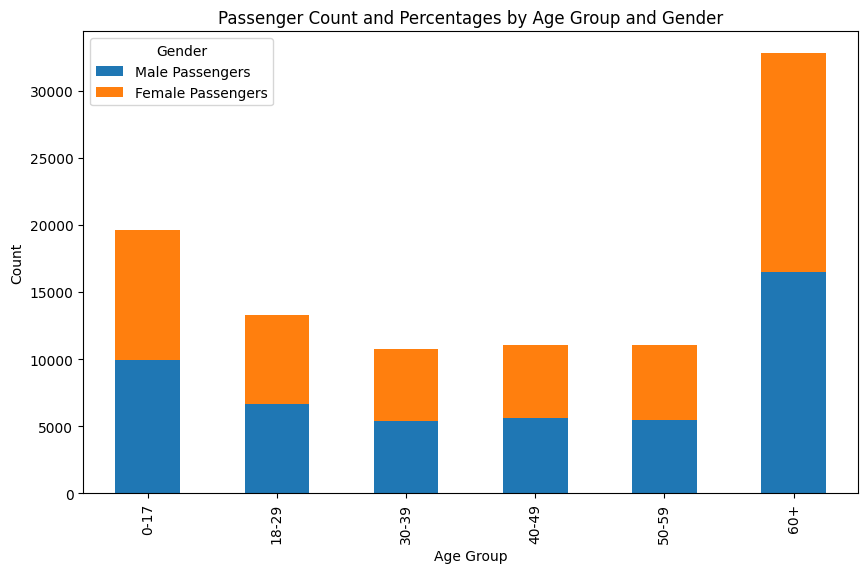

In [43]:
# Plot the data
# Here it is a stacked bar graph
age_group_counts.plot(y=['Male Passengers', 'Female Passengers'], kind='bar', stacked=True, figsize=(10, 6))
plt.title('Passenger Count and Percentages by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')

# Show the plot
plt.show()

In [44]:
# Exporting the result to CSV
age_group_counts.to_csv('output//age_group_counts.csv')

### How does the distribution of flight statuses vary across different months?

In [45]:
# Extract the month from the 'Departure Date' column and analyze flight activity by month
month_counts = airline_df['Departure Date'].dt.month.value_counts().sort_index()

print(month_counts)

# The results are presented in the numerical format, where 1 corresponds to January and so forth.

Departure Date
1     8416
2     7653
3     8431
4     7959
5     8496
6     8128
7     8451
8     8544
9     8149
10    8415
11    8053
12    7924
Name: count, dtype: int64


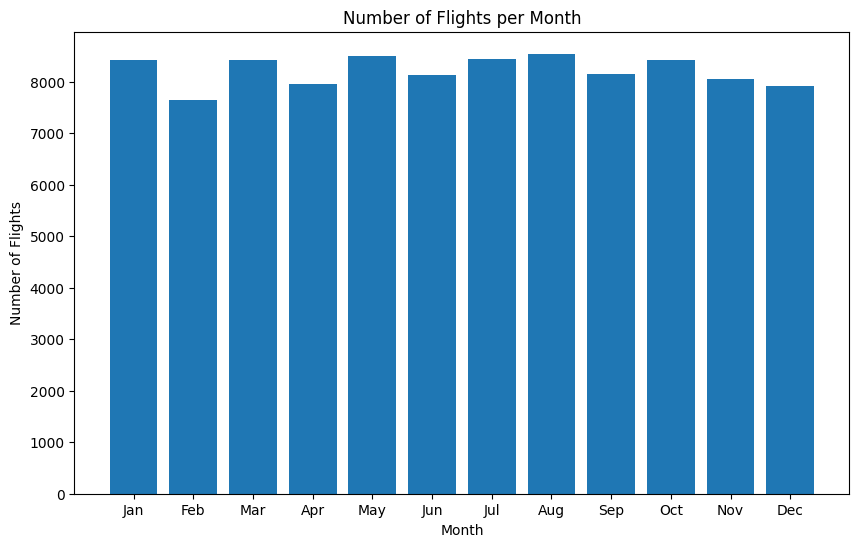

In [46]:
# Create a bar plot for flights per month
plt.figure(figsize=(10, 6))
plt.bar(month_counts.index, month_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Number of Flights per Month')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [47]:
# Create a table with the month names and the status of the flight

# Extract the month from the 'Departure Date'
airline_df['Departure Month'] = airline_df['Departure Date'].dt.month

# Create a mapping of month numbers to month names with custom order
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Apply the mapping to the 'Departure Month' column
airline_df['Departure Month'] = airline_df['Departure Month'].map(month_mapping)

# Reorder the months chronologically
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
airline_df['Departure Month'] = pd.Categorical(airline_df['Departure Month'], categories=month_order, ordered=True)

# Group the data by "Departure Month" and "Flight Status" and calculate the count of flights for each combination
flight_status_by_month = airline_df.groupby(['Departure Month', 'Flight Status'])['Passenger ID'].count().unstack(fill_value=0)

# Display the result as a Pandas DataFrame
print(flight_status_by_month)


Flight Status    Cancelled  Delayed  On Time
Departure Month                             
January               2747     2868     2801
February              2565     2537     2551
March                 2776     2794     2861
April                 2645     2715     2599
May                   2846     2853     2797
June                  2756     2678     2694
July                  2800     2778     2873
August                2864     2805     2875
September             2766     2723     2660
October               2797     2775     2843
November              2678     2700     2675
December              2702     2605     2617


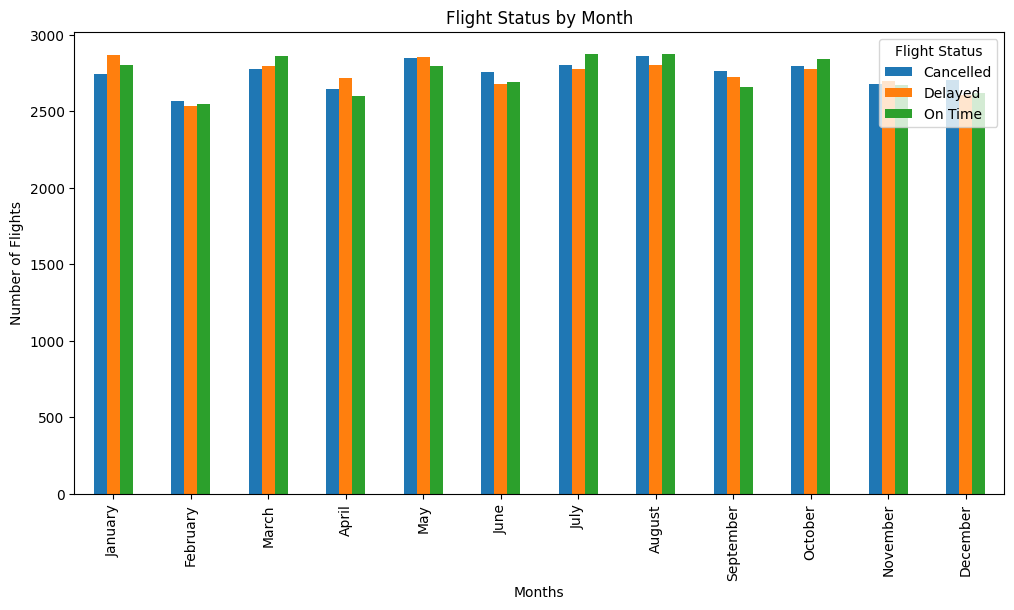

In [48]:
# Plot a bar graph
flight_status_by_month.plot(kind='bar', figsize=(12, 6))
plt.title('Flight Status by Month')
plt.xlabel('Months')
plt.ylabel('Number of Flights')

plt.show()

In [49]:
# Exporting the result to CSV
flight_status_by_month.to_csv('output//flight_status_by_month.csv')